In [1]:
!which python

/Users/saiha/opt/anaconda3/envs/churn-model/bin/python


In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
#standard imports
import os
import pickle
import sys
sys.path.append('..')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split,cross_val_score,learning_curve
import sklearn

from src.localpath import *
from src.data.make_dataset import load_training_data
from src.models.train_model import *

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
AdaBoostClassifier,
GradientBoostingClassifier,
RandomForestClassifier,


)
from sklearn.inspection import plot_partial_dependence
from sklearn.metrics import roc_curve

In [4]:
#Configuration for Jupyter Notebooks
pd.options.display.max_columns=100
pd.options.display.max_rows=100

# Load Featurized  Data

In [5]:
X_train,y_train=load_training_data(final=True)

# Load model results

In [6]:
model_results=load_model_results()

In [7]:
model_results.sort_values(by="roc_auc",ascending = False)

,model_filename,model_string,accuracy,precision,recall,f1,roc_auc
5,1401167362936023296.pkl,"AdaBoostClassifier(algorithm='SAMME.R', base_e...",0.802534,0.668012,0.497122,0.569543,0.846701
4,978465313962498816.pkl,"AdaBoostClassifier(algorithm='SAMME.R', base_e...",0.800828,0.659652,0.502878,0.570043,0.845129
1,1153113127975622144.pkl,"AdaBoostClassifier(algorithm='SAMME.R', base_e...",0.800070,0.650880,0.520863,0.578054,0.844914
3,1862026831261351680.pkl,"GradientBoostingClassifier(ccp_alpha=0.0, crit...",0.805940,0.671295,0.515827,0.582726,0.844507
2,2232346669262199552.pkl,"RandomForestClassifier(bootstrap=True, ccp_alp...",0.778111,0.603356,0.458273,0.525206,0.810954
0,652182741139790080.pkl,"DecisionTreeClassifier(ccp_alpha=0.0, class_we...",0.728512,0.478483,0.481295,0.479332,0.660695


# Load our Final model 

In [8]:
model=load_pickled_model('1401167362936023296.pkl')

In [9]:
most_important_features=sorted(zip(X_train.columns,model.feature_importances_),key= lambda x:x[1],reverse=True)
most_important_features

[('tenure', 0.42857142857142855),
 ('MultipleLines_Yes', 0.06493506493506493),
 ('MultipleLines_No phone service', 0.05844155844155844),
 ('StreamingMovies_Yes', 0.05844155844155844),
 ('StreamingTV_Yes', 0.045454545454545456),
 ('Contract_One year', 0.045454545454545456),
 ('PaperlessBilling', 0.03896103896103896),
 ('InternetService_Fiber optic', 0.03896103896103896),
 ('StreamingMovies_No internet service', 0.03896103896103896),
 ('OnlineSecurity_Yes', 0.032467532467532464),
 ('TechSupport_Yes', 0.032467532467532464),
 ('Contract_Two year', 0.032467532467532464),
 ('PaymentMethod_Mailed check', 0.025974025974025976),
 ('SeniorCitizen', 0.01948051948051948),
 ('Dependents', 0.012987012987012988),
 ('OnlineBackup_Yes', 0.012987012987012988),
 ('PaymentMethod_Electronic check', 0.012987012987012988),
 ('gender', 0.0),
 ('Partner', 0.0),
 ('DeviceProtection_Yes', 0.0),
 ('PaymentMethod_Credit card (automatic)', 0.0)]

# Look at partital dependence plots
we are going to look at these plots to determine the direction of influence of each of these features

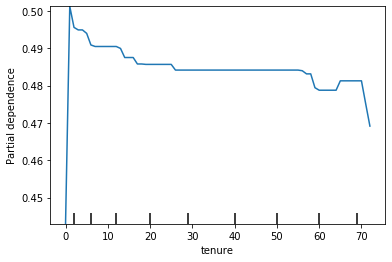

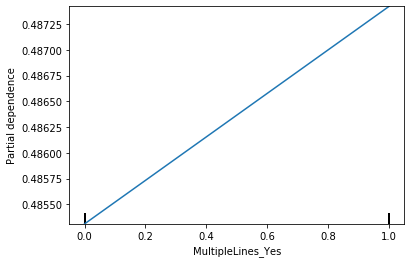

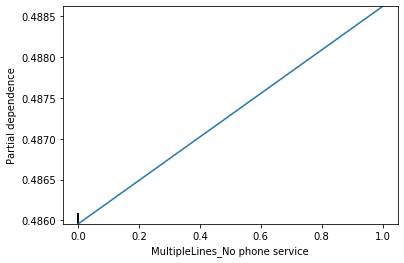

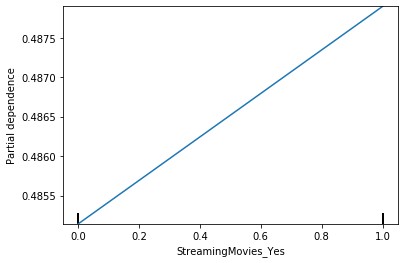

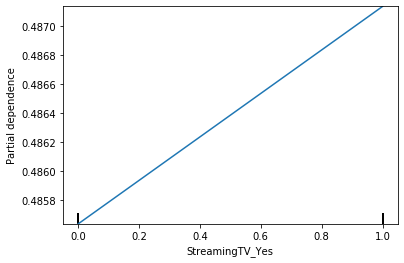

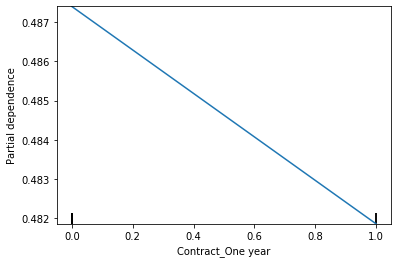

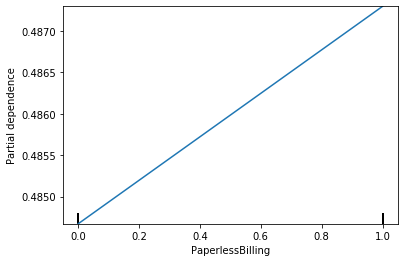

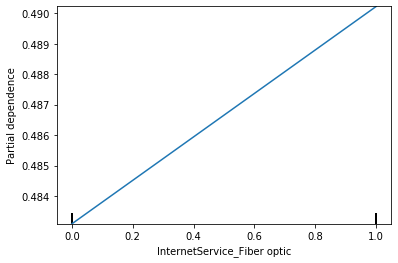

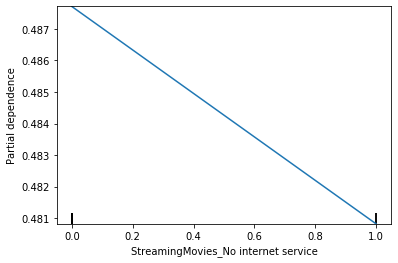

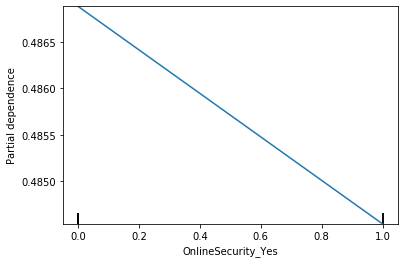

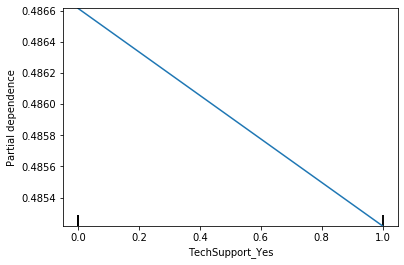

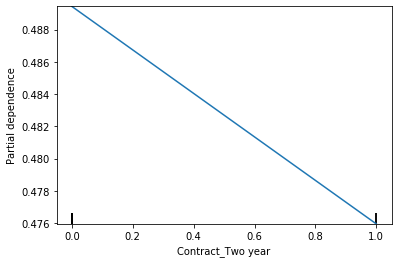

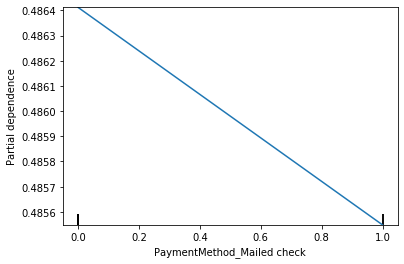

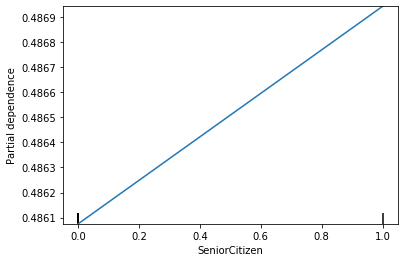

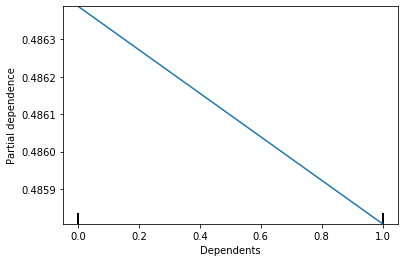

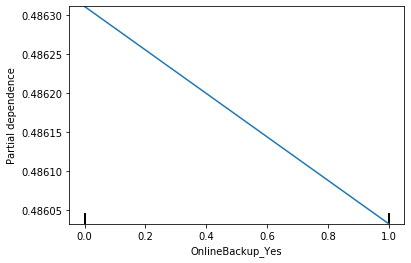

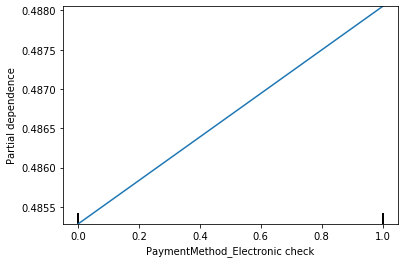

In [10]:
for col, val in most_important_features:
    if val > 0.01:
        plot_partial_dependence(model,X_train,[col])

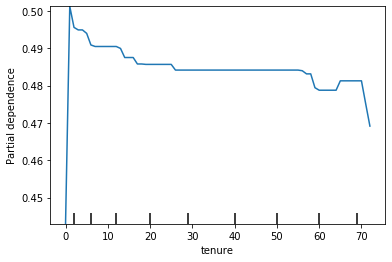

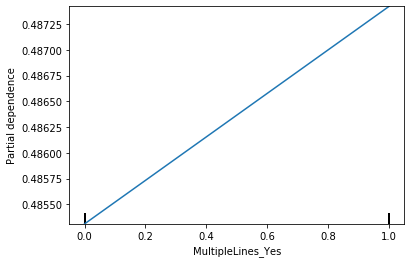

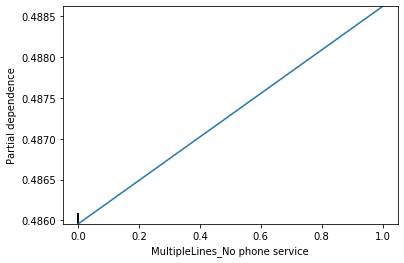

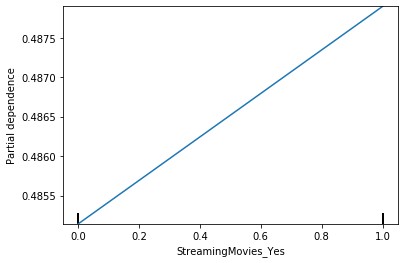

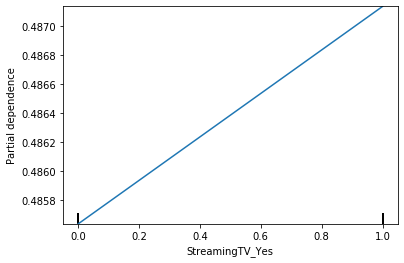

In [11]:
for col, val in most_important_features[:5]:
    if val > 0.01:
        plot_partial_dependence(model,X_train,[col])
        plt.savefig(REPORTS_DIRECTORY + f'/{col}.png')